# Assignment 7: Linear Model Selection and Regularization

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [2]:
import pandas as pd

train = pd.read_csv('train.csv')
train.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h3> Q.1. Drop the Id columns from both train and test as these are not needed for prediction</h3>

In [3]:
test = pd.read_csv('test.csv')

train = train.drop('Id', 1)
test = test.drop('Id', 1)
test.head()
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h3> Q.2. Visualize a scatter plot of 'GrLivArea' in the x-axis and 'SalePrice' in the y-axis. Can you spot any outliers?
</h3>

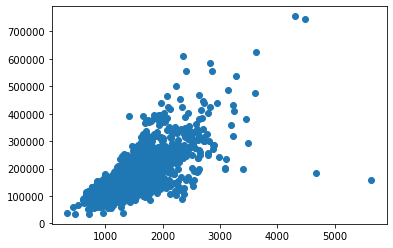

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.show()
# Yes, there are at least 2 outliers that are in the bottom right of this scatter plot. The 2 in the upper right
# could also be considered outliers, although they are potentially fitting the trend.

<h3> Q.3. Remove outliers in the data for all GrLivArea greater than 4000 then check the scatter plot again</h3>

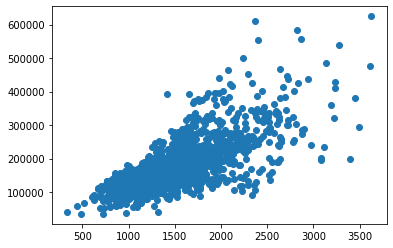

In [5]:
# Remove outliers for train['GrLivArea']>4000
train = train[train['GrLivArea'] <= 4000]

# Scatter plot
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.show()

<h3> Q.4.0 Convert categorical variable into dummy variables using pandas get_dummies API</h3>


In [6]:
train = pd.get_dummies(train)
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


<h3> Q.4.1 Impute missing data by the mean of each column.</h3>

In [7]:
for k in train.keys():
    if train[k].isna().sum() > 0:
        train[k].fillna(train[k].mean(), inplace=True)

<h3> Q.4.2 Generate train test split 70/30</h3>

In [8]:
from sklearn.model_selection import train_test_split
y = train["SalePrice"]
X = train.drop("SalePrice", 1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

<h3> Q.5. Fit a linear regression model to this data and compute the RMSE</h3>

In [9]:
from sklearn.linear_model import Ridge, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

#Fit a linear regression model to this data
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

#Compute the RMSE 
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print("RMSE", lin_rmse)

RMSE 23290.933391464314


## Lasso Regression

<h3> Q.6.0 Fit lasso regression to training data with alpha 20. (Bonus: You could try CV to find the best alpha within a range)</h3>

In [10]:
from sklearn import linear_model

#TODO: fit a Lasso regression model to this data
lasso_model = linear_model.Lasso(alpha=20.0, max_iter=5000, normalize=True).fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

#Compute the RMSE 
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)
print("Lasso RMSE", lasso_rmse)

Lasso RMSE 21576.20288685336


<h3> Q.6.1 How many columns has the model chosen?</h3>

In [11]:
#TODO
from IPython.display import display
pd.set_option('display.max_rows', None)
lasso_data = pd.DataFrame({'feature': X.columns, 'coefficient': lasso_model.coef_})
display(lasso_data)
pos_count = lasso_data[lasso_data['coefficient'] > 0.01].count()
neg_count = lasso_data[lasso_data['coefficient'] < -0.01].count()
print("The model lasso'ed 101 features.")

,feature,coefficient
0,MSSubClass,-31.583018
1,LotFrontage,2.586916
2,LotArea,0.513083
3,OverallQual,7697.120383
4,OverallCond,3665.094319
5,YearBuilt,198.864409
6,YearRemodAdd,79.836526
7,MasVnrArea,20.931380
8,BsmtFinSF1,16.366954
9,BsmtFinSF2,0.000000


The model lasso'ed 101 features.


## Ridge Regression

<h3> Q.7. Perform ridge regression with alpha set to 0.1 and normalize to True. (Bonus: You could try CV to find the best alpha within a range).</h3> 

In [17]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

# Create model
# ridge_model = linear_model.RidgeCV(alphas=(0.01, 1), normalize=True)
# ridge_model.fit(X_train, y_train)
# cross_val_score(ridge_model, X_train, y_train)
scores = []
alphas = (0.01, 0.1, 1, 10, 20)
for alpha in alphas:
    model = linear_model.Ridge(alpha=alpha, normalize=True)
    model.fit(X_train, y_train) # Todo: was this needed?
    scores.append({
        alpha: cross_val_score(estimator=model, X=X_train, y=y_train, cv=3).mean()
    })

print(scores)



[{0.01: 0.8759270443727617}, {0.1: 0.8911129123614949}, {1: 0.8876873915003721}, {10: 0.6956131918478478}, {20: 0.5524223800162726}]


<h3> Q.8. What is your root mean squared error (RMSE)? Comment on your observation</h3>

In [13]:
# Make the model, but only for 0.1 alpha this time
from sklearn import linear_model
ridge_model = linear_model.Ridge(alpha=0.1, normalize=True)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

#Compute the RMSE
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
print("Ridge RMSE", ridge_rmse)

# Lasso's score was 21576.20288685336 while Ridge's was 21803.962032773405. Lasso has a lower score which means it
# is likely the better choice.

Ridge RMSE 21803.962032773405


## Elastic Net Regression

<h3> Q.9. Perform elastic net regression with different values of alpha (0.01, 0.1 and 20). Compute the RMSE as well. 


In [14]:
#TODO: fit the Elastic net regression model to this data
from sklearn import linear_model
scores = []
alphas = (0.01, 0.1, 20)
for alpha in alphas:
    # Create and fit individual models
    model = linear_model.ElasticNet(alpha=alpha, max_iter=10000, normalize=True)
    model.fit(X=X_train, y=y_train)
    y_pred = model.predict(X_test)

    # Compute RMSEs
    elastic_mse = mean_squared_error(y_test, y_pred)
    elastic_rmse = np.sqrt(elastic_mse)

    scores.append({
        alpha: {
            'RMSE': elastic_rmse,
            'cv_score': cross_val_score(estimator=model, X=X_train, y=y_train, cv=3).mean()
        }
    })

print(scores)

[{0.01: {'RMSE': 32610.114216699745, 'cv_score': 0.8206314112724309}}, {0.1: {'RMSE': 59911.99780485582, 'cv_score': 0.39573239925382553}}, {20: {'RMSE': 72603.26393074224, 'cv_score': 0.0026302581412102066}}]


<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [15]:
# I've heard of Lasso before, and my friend who just completed his phd used it in his research. I think it'd be
# interesting to test out the different parameters available in the model and see what effect they have, i.e.
# the intercept option. I also wonder if imputing with mean had a significant effect. The elastic net had issues with
# max_iters and convergence warnings. I placed it to a very high max iter, and it is running for quite a long time (minutes).
# This was most certainly a surprise to me. Fortunately I saw someone post in the forum about increasing tolerance and
# normalizing the model. I also took a different approach for removing outliers (white listing <= 4000), but I am curious
# how to splice out / black list data (and what's the recommended way). I am also interested in why the CV score changed
# so drastically in my ElasticNet model at 20. When using ridge regression, it was closer to 0.5.